**UNIVERSIDAD NACIONAL DE COLOMBIA SEDE MANIZALES**

Tarea - Procesamiento Digital de Imagenes

Leonar Santiago Castro Vizcaya

co. 817010

#Métricas de Desempeño de Huber
*Huber loss*

Como metrica de desempeño para tareas de regresion se define la perdida de huber como una metrica de desempeño cuya funcion de error esta definida por partes, contando con la ventaja de combinar propiedades de la funcion de error cuadratico medio y la funcion de error absoluto medio, haciendo el error menos o mas sensible a valores atipicos dependiendo del valor del parametro *delta*):

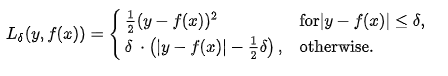

#Area Bajo la Curva (ROC - AUC)
ROC: Caracteristicas del funcionamiento del receptor

AUC: Area bajo la curva

El Area dajo la curva ROC es una metrica de desempeño que indica que tan bien puede distinguir un modelo entre dos clases. Dicha curva ROC tiene como ventaja que permite comparar diferentes modelos para identificar cual otorga mejor rendimiento como clasificador.
La curva es una comparacion entre la **razon de verdaderos positivos** y la **razon de falsos positivos**

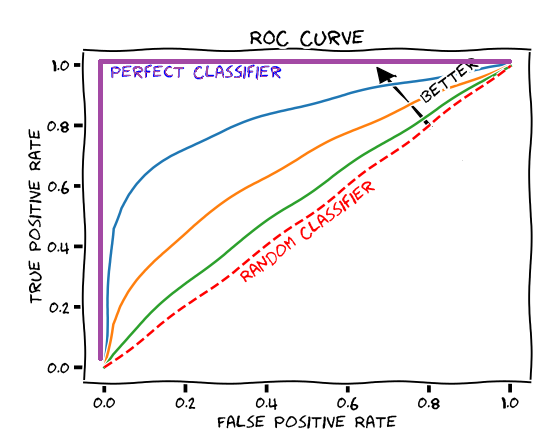

Cuanto más esté hacia la izquierda la curva, más área habrá contenida bajo ella y por ende, mejor será el clasificador. El clasificador aleatorio tendría una AUC de 0.5 mientras que el clasificador perfecto (en morado) tendría un AUC de 1. 

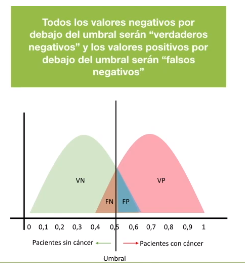

#Generalizacion de las medidas de desempeño para clasificacion multiclase y multisalida:

Los datos se tratan entonces como una coleccion de problemas binarios, uno para cada clase.  Luego, hay varias formas de promediar los cálculos de métricas binarias en el conjunto de clases.

Formas: seccion(3.3.2.1)
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter




##Presicion

En la clasificación multietiqueta, la función devuelve la precisión del subconjunto. Si todo el conjunto de etiquetas pronosticadas para una muestra coincide estrictamente con el verdadero conjunto de etiquetas, entonces la precisión del subconjunto es 1,0; de lo contrario es 0.0.




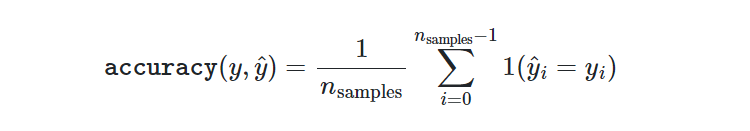

**^y** : Valores predichos de las muestras

**y** : Valor verdadero correspondiente


```
#Funcion accuracy_score de sklearn.metrics
>>> import numpy as np
>>> from sklearn.metrics import accuracy_score
>>> y_pred = [0, 2, 1, 3]
>>> y_true = [0, 1, 2, 3]
>>> accuracy_score(y_true, y_pred)
0.5
>>> accuracy_score(y_true, y_pred, normalize=False)
2
```

En el caso de multiples etiquetas con indicadores de etiqueta binarias:
```
>>> accuracy_score(np.array([[0, 1], [1, 1]]), np.ones((2, 2)))
0.5
```

##Matriz de Confusion
Evalúa la precisión de la clasificación calculando la matriz de confusión con cada fila correspondiente a la clase verdadera.

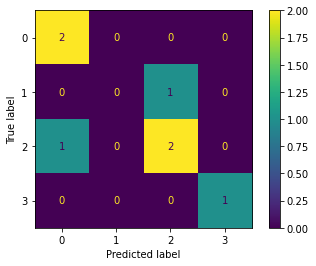

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib as plt
y_true = [2, 0, 2, 2, 0, 1,3]
y_pred = [0, 0, 2, 2, 0, 2,3]
k=confusion_matrix(y_true, y_pred)
d = ConfusionMatrixDisplay(confusion_matrix=k)
d.plot()



##ROC - AUC

En clasificacion multiclase se admiten dos estrategias de promedio: el algoritmo uno contra uno que calcula el promedio de las puntuaciones de AUC de ROC por pares, y el algoritmo uno contra el resto que calcula el promedio de las puntuaciones de AUC de ROC para cada clase frente a todas las demás clases. En ambos casos, las etiquetas pronosticadas se proporcionan en una matriz con valores de 0 al numero de clases y las puntuaciones corresponden a las estimaciones de probabilidad de que una muestra pertenece a una clase particular.

###Uno contra uno:
Calcula el AUC promedio de todas las posibles combinaciones de clases por pares.

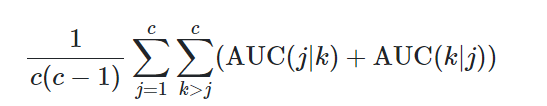

c: Numero de clases 

AUC( j | k ): AUC con clase j como clase positiva y la clase k como clase negativa.

###Uno contra el resto:
 Calcula el AUC de cada clase contra el resto

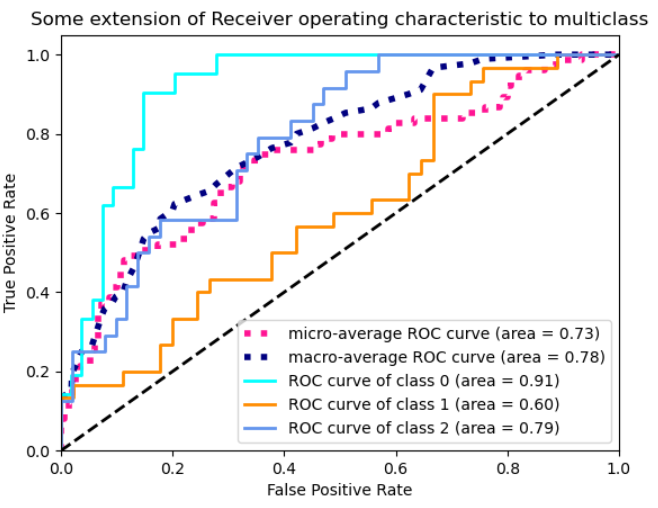

#Clase con Metricas sin librerias:

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
class Metricas:
  """
  mse
  msa
  precision
  exactitud
  exahustividad
  loss_Huber
  AUC
  Matriz_confusion

  """

  def __init__(self):
    pass

  def mse(self, Y, Y_): # Error cuadratico medio
    self.Y = Y
    self.Y_ = Y_

    N = len(self.Y)
    total = 0
    if Y.shape != self.Y_.shape or self.Y.ndim != self.Y_.ndim or self.Y_.ndim != 1 or self.Y.ndim != 1: #Validacion tamaño y dimension
      print("El tamaño de los arreglos debe ser el mismo y la dimension debe ser igual una en cada caso.")
    else:
      for i in range(N):
              
        loss = self.Y[i] - self.Y_[i]       
        mse = (loss)**2
        total += mse
    return total/N
  
  def mae(self,Y, Y_): #Error Absoluto Medio
    self.Y = Y
    self.Y_ = Y_
    N = len(self.Y)
    if Y.shape != self.Y_.shape or self.Y.ndim != self.Y_.ndim or self.Y_.ndim != 1 or self.Y.ndim != 1: #Validacion tamaño y dimension
      print("El tamaño de los arreglos debe ser el mismo y la dimension debe ser igual una en cada caso.")
    else:     
      total = 0
      for i in range(N):
          
        loss = abs(self.Y[i] - self.Y_[i])       
        total += loss
    return total/N

  def exactitud(self, Y, Y_, n_clases):
    N = Y.shape[1]
    self.Y = Y
    self.Y_ = Y_
    clases = np.arange(0,n_clases,1)
    #= np.arange(0,1,0.1)
   
    for i in range(N):
      count_clase=0      
      for j in range(N):      
        comp= self.Y[i]==self.Y_[j]
        if Y[i]==Y_[j]:         
          count_clase += 1
      clases[Y[i]-1] = count_clase
      suma = np.sum(clases)
    return print("Exactitud: ", suma/N, "conteo por clases: ", clases)


  def loss_Huber(self, Y, Y_, delta): #delta: R+ que determina los rangos de la funcion por partes.

    self.Y = Y
    self.Y_ = Y_
    self.delta = delta
  

    if Y.shape != self.Y_.shape or self.Y.ndim != self.Y_.ndim or self.Y_.ndim != 1 or self.Y.ndim != 1: #Validacion tamaño y dimension
      print("El tamaño de los arreglos debe ser el mismo y la dimension debe ser igual una en cada caso.")

    else:
      
      N = len(self.Y)
      total = 0
      for i in range(N):
        
        if abs(self.Y[i] - self.Y_[i]) <= self.delta:
          loss = self.Y[i] - self.Y_[i]       
          loss_huber = (loss/2)**2
          total += loss_huber

        else:
          loss = self.Y[i] - self.Y_[i]     
          loss_huber = self.delta*(abs(self.Y[i] - self.Y_[i])-(1/2)*self.delta)
          total = total + loss_huber
  
    return total/N

  def AUC_bin(self, Y, Y_ ):
    #pend. Validacion o binarizacion de las entradas np.where(a>1)

    N = len(Y_)
    Matriz = np.zeros((2,2)) 
    VP = 0
    VN = 0
    FP = 0
    FN = 0
    umbral = np.arange(0,1,0.1)
    y = np.zeros(len(umbral))
    x = np.zeros(len(umbral))
    ciclo = 0
    vector_du = np.zeros(10)
    vector_du.fill(0.1)

    Y_bin = np.zeros(len(Y))

    if Y.shape != Y_.shape or Y.ndim != Y_.ndim or Y_.ndim != 1 or Y.ndim != 1: #Validacion
      print("El tamaño de los arreglos debe ser el mismo y la dimension debe ser igual una en cada caso.")
    else:
        for j in umbral:  #Variacion del umbral 0.0 - 1.0
          
          Y_bin[np.where(Y_ >= j)] = 1 #Binarizacion del conjunto de valores de prediccion 
          Y_bin[np.where(Y_ < j)] = 0  # ""

          for i in range(N):# Recorrido completo de los vectores
            if Y[i]==1 and Y_bin[i]==1:
              VP += 1
            elif Y[i]==1 and Y_bin[i]==0:
              FN += 1
            elif Y[i]==0 and Y_bin[i]==0:
              VN += 1
            else:
              FP += 1

            Matriz[1,1] = VP
            Matriz[0,1] = FN
            Matriz[1,0] = FP
            Matriz[0,0] = VN

          if (VP + FN) != 0:
            VPR = VP/(VP+FN)#Razon de verdaderos postivos (Sensibilidad -Recall)
            y[ciclo] = VPR
          else: 
            VPR = 0
            y[ciclo] = VPR
          if (FP+VN)!=0:
            FPR=FP/(FP+VN)#Razon de falsos postivos (1 - Especifidad )
            x[ciclo] = FPR
          else: 
            FPR = 0
            x[ciclo] = FPR
          ciclo += 1 

        Area = np.dot(y,vector_du.reshape(-1)) 
        
        plt.title(str(Area))   
        plt.rcParams["figure.figsize"] = (4, 4)
        plt.plot(x,y)
        
        
        
        

  def Matriz_confusion(self, Y, Y_, n_clases=2):
    
    N = Y.shape[1]
    Matriz = np.zeros((n_clases,n_clases)) 
    M=np.concatenate((Y, Y_))
    true  = np.asarray([True, True])
    for i in range(N):
      count=0
      for j in range(N):
        comp = M[:,i]==M[:,j]
        if comp[0]==True and comp[1]==True:
          count +=1 
      f = M[1,i]
      c = M[0,i]
      Matriz[f,c]=count

    plt.imshow(Matriz)

    for i in range(n_clases):
      for j in range(n_clases):
        text = int(Matriz[i,j])
        plt.text(i, j, text, fontsize=10, color='black')
        

    plt.yticks(range(0, n_clases, 1))
    plt.xticks(range(0, n_clases, 1))
    plt.xlabel("Predicted label")
    plt.ylabel("True label")  
    plt.colorbar()
    plt.show()

    



##Error cuadratico medio MSE

In [ ]:
desempeño = Metricas()

X = np.array([ 1,    1,   0,   0 , 0,   1,   0,   1,   1]) # y true
X_ = np.array([0.9, 0.9, 0.2, 0.1, 0.5, 300, 0.1, 0.7,0.6]) #y predict

desempeño.mse(X,X_)

9933.50888888889

##Error absoluto medio MAE

In [ ]:
desempeño = Metricas()

X = np.array([ 1,    1,   0,   0 , 0,   1,   0,   1,   1]) # y true
X_ = np.array([0.9, 0.9, 0.2, 0.1, 0.5, 300, 0.1, 0.7,0.6]) #y predict

desempeño.mae(X,X_)

33.422222222222224

##Loss- Huber

In [ ]:
X = np.array([ 1,    1,   0,   0 , 0,   1,   0,   1,   1]) # y true
X_ = np.array([0.9, 0.9, 0.2, 0.1, 0.5, 0.8, 0.1, 0.7,0.6]) #y predict

desempeño = Metricas()
desempeño.loss_Huber(X, X_, 0.2)

0.023333333333333334

##ROC - AUC (binario)

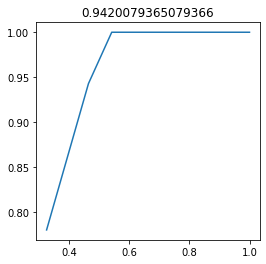

In [ ]:
X = np.array([ 1,    1,   0,   0 , 0,   1,   0,   1,   1]) # y true
X_ = np.array([0.9, 0.9, 0.2, 0.1, 0.6, 0.5, 0.1, 0.7,0.6]) #y predict
#X_ = np.array([ 1,    1,   0,   0 , 0,   1,   0,   1,   1]) # y true
desempeño = Metricas()
desempeño.AUC_bin(X, X_)

##Matriz de confusion multiclase

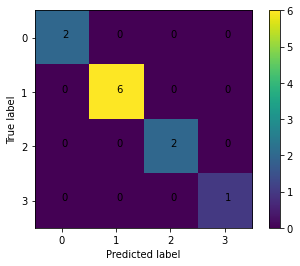

In [ ]:
X = np.array([[1, 1, 2, 1, 0, 2, 0, 1, 1, 1,3]]) # y true
X_ = np.array([[1, 1, 2, 1, 0, 2, 0, 1, 1,1,3]]) # y predict 
desempeño.Matriz_confusion(X,X_,4)

#Clase con Metricas usando los paquetes de Sklearn.

In [ ]:
from os import EX_CANTCREAT
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:


class Metricas2:
  """
  metric class with sklearn libraries
  MSE
  MAE
  Exactitud
  loss_Huber
  AUC
  Sensibilidad
  Precision
  F1_score
  Matriz_confusion
  """

  def __init__(self):
    pass

  def mse(self, Y, Y_): # Error cuadratico medio
    mse = mean_squared_error(Y, Y_)
    return(round(mse,2))
   
  
  def mae(self,Y, Y_): #Error Absoluto Medio
    mae = mean_absolute_error(Y, Y_)
    return(mae)
   
  def exactitud(self, Y, Y_, n_clases):
    exact = accuracy_score(Y, Y_)
    return(exact)    

  #def loss_Huber(self, Y, Y_, delta): #delta: R+ que determina los rangos de la funcion por partes.

  def AUC_bin(self, Y, Y_ ):
    auc = roc_auc_score(Y, Y_)
    return(auc)

  def sensibilidad(self, Y, Y_):
    sens = recall_score(Y, Y_)
    return(sens)
  
  def precision(self, Y, Y_):
    precision = precision_score(Y,Y_)
    return(precision)
    
    
  def f1_score(self, Y, Y_):
    f1 = f1_score(Y, Y_)
    return(f1)   


  def Multilabel_Matriz_confusion(self, Y, Y_, n_clases=2):
    mat = multilabel_confusion_matrix(Y,Y_)
    return mat

  def Matriz_confusion(self, Y, Y_, n_clases=2):
    mat = confusion_matrix(Y,Y_)
    plt.imshow(mat)
    for i in range(n_clases):
      for j in range(n_clases):
        text = int(mat[i,j])
        plt.text(i, j, text, fontsize=10, color='black')
    plt.yticks(range(0, n_clases, 1))
    plt.xticks(range(0, n_clases, 1))
    plt.xlabel("Predicted label")
    plt.ylabel("True label")  
    plt.colorbar()
    plt.show()

##Pruebas:

###Error Cuadratico medio MSE

In [ ]:
desempeño = Metricas2()

X = np.array([ 1,    1,   0,   0 , 0,   1,   0,   1,   1]) # y true
X_ = np.array([0.9, 0.9, 0.2, 0.1, 0.5, 300, 0.1, 0.7,0.6]) #y predict

desempeño.mse(X,X_)

###Error absoluto medio MAE

In [ ]:
desempeño = Metricas2()

X = np.array([ 1,    1,   0,   0 , 0,   1,   0,   1,   1]) # y true
X_ = np.array([0.9, 0.9, 0.2, 0.1, 0.5, 300, 0.1, 0.7,0.6]) #y predict

desempeño.mae(X,X_)

AUC

In [ ]:
X = np.array([ 1,    1,   0,   0 , 0,   1,   0,   1,   1]) # y true
X_ = np.array([0.9, 0.9, 0.2, 0.1, 0.6, 0.5, 0.1, 0.7,0.6]) #y predict
#X_ = np.array([ 1,    1,   0,   0 , 0,   1,   0,   1,   1]) # y true
desempeño = Metricas2()
desempeño.AUC_bin(X, X_)

###Matriz de confunsion multiclase

In [ ]:
X = np.array([2, 0, 2, 2, 0, 1]) # y true
X_ = np.array([0, 0, 2, 2, 0, 2]) # y predict 


desempeño = Metricas2()
desempeño.Multilabel_Matriz_confusion(X,X_)

#Clase con Metricas usando los paquetes de Keras.

In [ ]:
from keras import metrics
import keras as k

In [ ]:
class Metricas3:
  """
  metric class with keras libraries
  MSE
  MAE
  Exactitud
  loss_Huber
  AUC
  Sensibilidad
  Precision
  F1_score
  Matriz_confusion
  """

  def __init__(self):
    pass

  def mse(self, Y, Y_): # Error cuadratico medio
    mse = metrics.mean_squared_error(Y, Y_)
    return(mse)
   
  
  def mae(self,Y, Y_): #Error Absoluto Medio
    mae = metrics.mean_absolute_error(Y, Y_)
    return(mae)
   
  def exactitud(self, Y, Y_, n_clases):
    exact = metrics.binary_accuracy(Y, Y_)
    return(exact)    

  #def loss_Huber(self, Y, Y_, delta): #delta: R+ que determina los rangos de la funcion por partes.

  def AUC_bin(self, Y, Y_ ):
    auc = metrics.AUC(Y, Y_, num_thresholds=200,curve='ROC')
    return(auc)

  def sensibilidad(self, Y, Y_):
    Y =  K.ones_like(Y)
    positives =  K.sum(K.round(K.clip(Y* Y_, 0, 1)))
    all_positives = K.sum(K.round(K.clip(Y, 0, 1)))
    sens = positives / (all_positives + K.epsilon())
    return(sens)

 
  def precision(self, Y, Y_):
    Y =K.ones_like(Y) 
    positives = K.sum(K.round(K.clip(Y * Y_, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(Y, 0, 1)))
    precision =positives / (predicted_positives + K.epsilon())

    return(precision)

   

  def Matriz_confusion(self, Y, Y_, n_clases=2):
    mat = metrics.confusion_matrix(Y,Y_)
    return mat

##Pruebas:

###Error cuadratico medio MSE

In [ ]:
desempeño = Metricas3()

X = np.array([ 1,    1,   0,   0 , 0,   1,   0,   1,   1]) # y true
X_ = np.array([0.9, 0.9, 0.2, 0.1, 0.5, 300, 0.1, 0.7,0.6]) #y predict

desempeño.mse(X,X_)

### Error absoluto medio MAE

In [ ]:
desempeño = Metricas3()

X = np.array([ 1,    1,   0,   0 , 0,   1,   0,   1,   1]) # y true
X_ = np.array([0.9, 0.9, 0.2, 0.1, 0.5, 300, 0.1, 0.7,0.6]) #y predict

desempeño.mae(X,X_)

#Referencias:
https://www.analyticsvidhya.com/blog/2019/08/detailed-guide-7-loss-functions-machine-learning-python-code/

https://www.youtube.com/watch?v=QBbC3Cjsnjg&ab_channel=CodeEmporium

https://runebook.dev/es/docs/scikit_learn/modules/multiclass